# Positive News: How positive are News Organizations on Twitter?

This project is looking at 5 major news outlets and analyzing their latest 100 Tweets to see if they tend to talk positivly or negativly. The sentiment is evaluated using the VADER Sentiment Analysis. In this analysis, text imputs are graded on a scale of -1 to 1 to show a negative (-1) or positive (1) statement with a value of 0 meaning completely neutral. The values shown are a composite score, showing the aggregate of how positive/neutral/negative the entire text. 

Data was pulled at 2:00 PM on Saturday, January 6th. Graph outputs are saved into the "Figures" folder.

In order to run the script, you will need your own Twiter API keys. Visit https://developer.twitter.com/ to learn more and find your keys.

### Observations:

- The news organization with the closest to neutral sentiment was @CBSNews. Though they are close to neitral, they tend to be more negative.
- The most surprising part of the data set was just how close these figures actually are to being truely neutral. News is not supposed to be sensationalized, but rather report on facts. This kind of analysis is one way to display the neutrality of these new organizations in their reporting.
- The most conservative leaning news organization of the bunch, @FoxNews, is the most positive. WIth the current political climate, I find it interesting the news organization that would most likely be friendly and positive to the current President's vision is also the most positive.
- By the eye test looking at the scatter plot with all combined scores, it seems @CBSNews and @FoxNews are the two organizations with the most variance of their sentiments in this data set. These two organizations have, at the extremes, more overly positive and overly negative tweets.

In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Set up twitter API sequence
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Find twitter handles of major news outlets
News = ["@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

# Create an empty DF to be filled in a loop
News_Sent = pd.DataFrame()

In [4]:
# Make a loop to go through all News organizations
counter = 0

while counter < len(News):

    user = News[counter]
    comp = []

    for x in range(5):
    
        tweets = api.user_timeline(user,page=x)
    
        for tweet in tweets:

            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            comp.append(compound)
            
    News_Sent[user] = comp
    
    counter += 1

In [6]:
# Check to ensure DF is complete
News_Sent.head(10)

,@BBC,@CBSNews,@CNN,@FoxNews,@nytimes
0,0.3612,-0.2960,-0.8481,0.3612,0.0000
1,0.5859,0.0000,-0.6908,0.0000,0.0000
2,0.4118,-0.5574,0.0000,0.0000,0.0516
3,0.3612,-0.8555,0.0000,-0.4939,0.0847
4,0.0000,-0.7964,-0.7269,0.8074,0.0000
5,0.0000,0.5859,-0.3338,0.5719,0.3182
6,-0.7269,0.7964,0.0000,0.0000,0.0000
7,-0.2006,0.0000,0.0000,0.0000,0.0000
8,-0.6486,0.4019,-0.2960,-0.2960,-0.4939
9,0.4588,0.0000,0.0000,0.0000,-0.5994


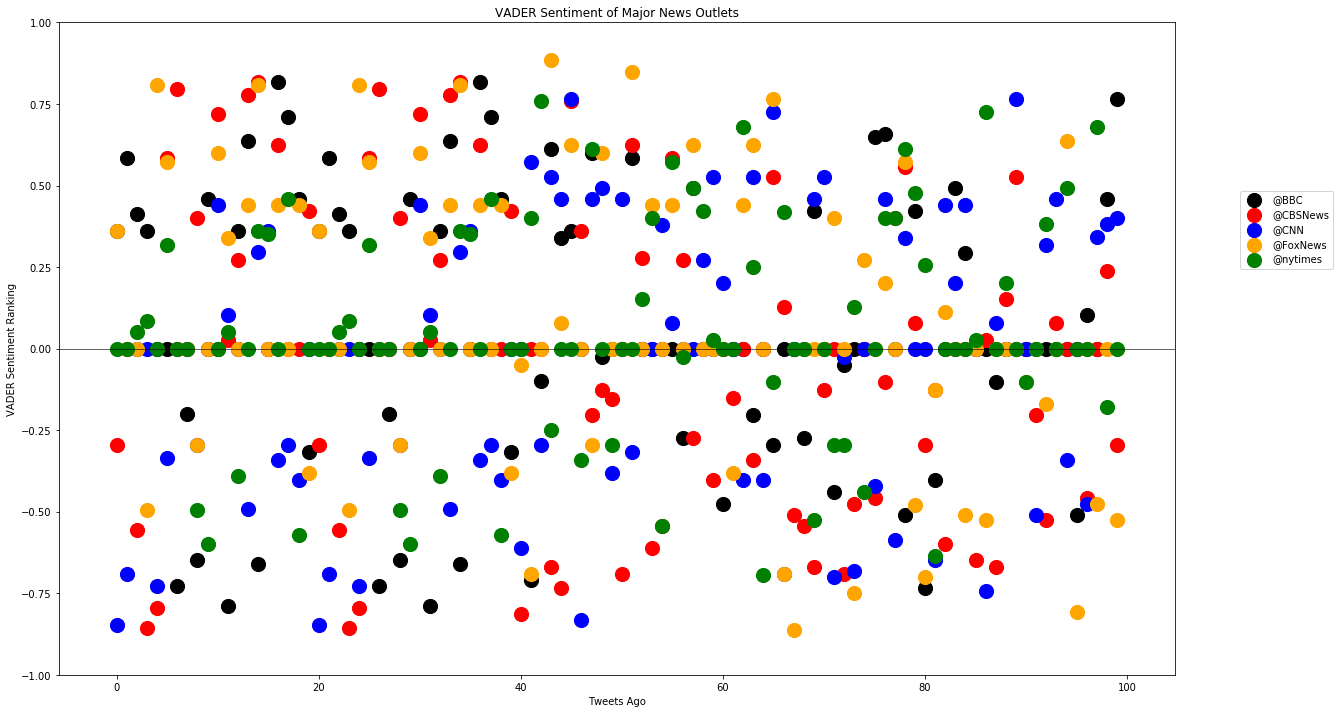

In [7]:
# Make a merged scatter plot with all VADER readings
xaxis = np.arange(100)

plt.figure(figsize = (20,12))

BBC = plt.scatter(xaxis, News_Sent["@BBC"], c= "black", s=200)
CBS = plt.scatter(xaxis, News_Sent["@CBSNews"], c = "red", s=200)
CNN = plt.scatter(xaxis, News_Sent["@CNN"], c = "blue", s=200)
Fox = plt.scatter(xaxis, News_Sent["@FoxNews"], c = "orange", s=200)
NYT = plt.scatter(xaxis, News_Sent["@nytimes"], c = "green", s=200)

lgnd = plt.legend(handles=[BBC, CBS, CNN, Fox, NYT], scatterpoints=1, fontsize=16)
plt.legend(loc=9, bbox_to_anchor=(1.1, .75))
plt.ylim(-1, 1)
plt.axhline(y=0, linestyle='-', linewidth = 1, color = "black", alpha = .6)
plt.title("VADER Sentiment of Major News Outlets")
plt.xlabel("Tweets Ago")
plt.ylabel("VADER Sentiment Ranking")

plt.savefig("Figures/VADER_Scatter", bbox_inches = 'tight')
plt.show()

In [8]:
# Make a new list with all the VADER averages

Aveg = []
Z = 0

while Z < len(News):
    Aveg.append(News_Sent[News[Z]].mean())
    
    Z += 1
 
Aveg

[0.05783299999999999,
 -0.016465,
 -0.03466299999999999,
 0.076866,
 0.044882000000000005]

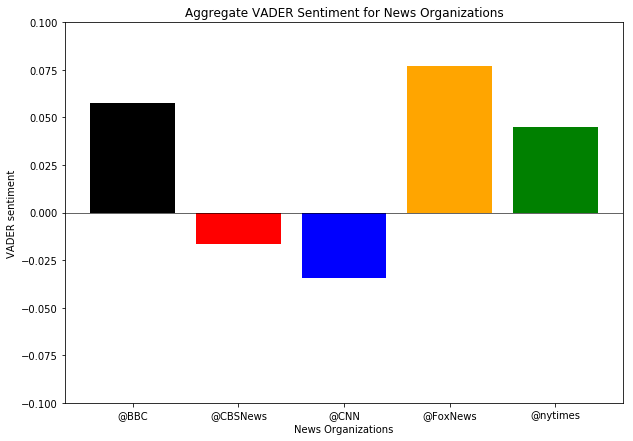

In [10]:
# Make a bar chart to show average VADER rating
xaxis = np.arange(len(News))
yaxis = Aveg
color = ["black", "red", "blue", "orange", "green"]

plt.figure(figsize = (10,7))

plt.bar(xaxis, yaxis, color = color, align="edge")

tick_locations = [value+.4 for value in xaxis]
plt.xticks(tick_locations, News)
plt.ylim(-.1,.1)
plt.axhline(y=0, linestyle='-', linewidth = 1, color = "black", alpha = .6)
plt.xlabel("News Organizations")
plt.ylabel("VADER sentiment")
plt.title("Aggregate VADER Sentiment for News Organizations")

plt.savefig("Figures/VADER_Bar", bbox_inches = 'tight')
plt.show()